# 1. Statistical Process Control

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math

## (a) Construct an EWMA control chart with 𝜆 = 0.1. Use 𝐿 = 2.81. Does the process appear to be in control?

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/MDS_Assignment4/heartrate.csv")

In [ ]:
X = df['Heart Rate'].values.tolist()

In [ ]:
# parameter
# u_0 = sum(X)/len(X)
u_0 = 70  # todo: To be confirmed
sigma = 3
t = list(range(1, 21))  # t = [1, 2, 3, ..., 20]

lamda = 0.1
L = 2.81

In [ ]:
# z values
z = [0] * (len(X)+1)  # create list: z_0, z_1, ..., z_20, and initialized with 0
z[0] = u_0  # assign u_0 to z_0

for i in range(1,21):  # calculate z_1 to z_20
  z[i] = lamda*X[i-1] + (1-lamda)*z[i-1]  # since index of X=[0,19], set X[i-1] instead of X[i] avoid out of range

In [ ]:
# calculate LCL & UCL
lcl = [u_0-L*sigma*math.sqrt(((lamda/(2-lamda))*(1-(1-lamda)**(2*i)))) for i in t]
ucl = [u_0+L*sigma*math.sqrt(((lamda/(2-lamda))*(1-(1-lamda)**(2*i)))) for i in t]

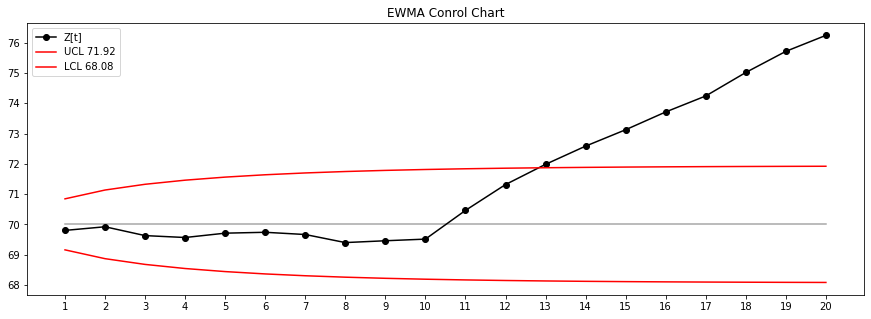

In [ ]:
# plotting
plt.figure(figsize=(15,5))
plt.plot(z[1:], marker="o", color="k", label="Z[t]")
plt.plot([u_0]*len(X), color="k", alpha=0.35)
plt.plot(ucl,color="r",label="UCL {}".format(round(ucl[len(ucl)-1], 2)))
plt.plot(lcl,color="r",label="LCL {}".format(round(lcl[len(lcl)-1], 2)))
plt.xticks(list(range(20)), list(range(1,21)))  # xtick 第二項設定刻度
plt.title("EWMA Conrol Chart")
plt.legend(loc="upper left")
plt.show()

The data didn't appear to be in control at some datapoint.

## (b) Construct an EWMA control chart with 𝜆 = 0.5. Use 𝐿 = 3.07. Compare your results to those in part (a).

In [ ]:
# parameter
# u_0 = sum(X)/len(X)
u_0 = 70  # todo: To be confirmed
sigma = 3
t = list(range(1, 21))  # t = [1, 2, 3, ..., 20]

lamda = 0.5
L = 3.07

In [ ]:
# z values
z = [0] * (len(X)+1)  # create list: z_0, z_1, ..., z_20, and initialized with 0
z[0] = u_0  # assign u_0 to z_0

for i in range(1,21):  # calculate z_1 to z_20
  z[i] = lamda*X[i-1] + (1-lamda)*z[i-1]  # since index of X=[0,19], set X[i-1] instead of X[i] avoid out of range

In [ ]:
# calculate LCL & UCL
lcl = [u_0-L*sigma*math.sqrt(((lamda/(2-lamda))*(1-(1-lamda)**(2*i)))) for i in t]
ucl = [u_0+L*sigma*math.sqrt(((lamda/(2-lamda))*(1-(1-lamda)**(2*i)))) for i in t]

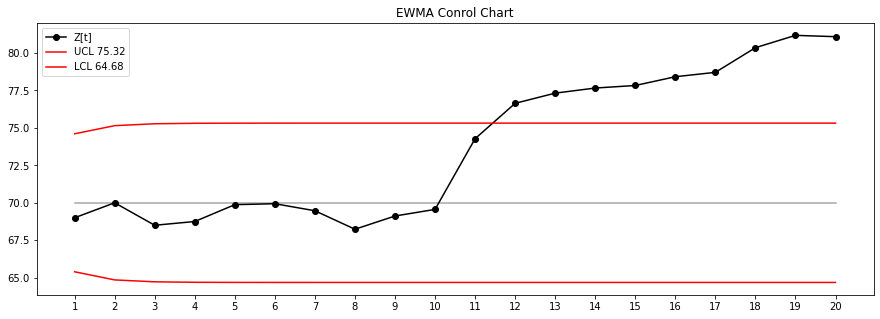

In [ ]:
# plotting
plt.figure(figsize=(15,5))
plt.plot(z[1:], marker="o", color="k", label="Z[t]")
plt.plot([u_0]*len(X), color="k", alpha=0.35)
plt.plot(ucl,color="r",label="UCL {}".format(round(ucl[len(ucl)-1], 2)))
plt.plot(lcl,color="r",label="LCL {}".format(round(lcl[len(lcl)-1], 2)))
plt.xticks(list(range(20)), list(range(1,21)))  # xtick 第二項設定刻度
plt.title("EWMA Conrol Chart")
plt.legend(loc="upper left")
plt.show()

- 𝐿 的影響：(b) 中 𝐿 較大，代表管制範圍較寬鬆
  - (a) UCL-LCL = 3.84
  - (b) UCL-LCL = 10.64
- 𝜆 的影響：平滑指數，𝜆 越大代表越看重現在的資料，𝜆 越小代表較參考過去資料。
  - 可從 (a) 看出曲線較平滑，而 (b) 的起伏較大。
- 在 (b) 中有 9 個樣本超出管制範圍，(a) 有 8 個樣本超出管制範圍。看起來 (a) 的效果較佳。

## (c) If the heart rate mean shifts to 76, approximate the ARLs for the charts in parts (a) and (b).

1. Refer to [1], when 𝐿 = 2.81, 𝜆 = 0.1, 𝜎 = 3, and 76-70=6 (which is 2 times of sigma):

<img src="https://i.imgur.com/TKjrs9W.jpeg" width=400/>

    - The approximate ARL for parts (a) is 4.36


2. Refer to [1], when 𝐿 = 3.07, 𝜆 = 0.5, 𝜎 = 3, and 76-70=6 (which is 2 times of sigma):

<img src="https://i.imgur.com/ALH0JYn.jpeg" width=400/>

    - The approximate ARL for parts (b) is 3.66

## (d) What’s the probability that the control chart detects a shift to 76 on the first sample following the shift?

The Probability that x̅ falls between the control limits is:

<img src="https://i.imgur.com/lHoIOC6.jpeg" width=400 />


β = P(not detecting a shift on the 1st sample)

P(detecting a shift on the first sample)

= 1-β

= 1-0.0828

= 0.9172

## (e) What's the probability that the control chart does not detect a shift to 76 on the first sample following the shift, but does detect it on the second sample?

β = P(not detecting a shift on the 1st sample)

P(detecting the shift on the second sample)

= β*(1-β)

= 0.0828*(1-0.0828)

= 0.07594416

## Reference
[1] A Simple Method for Studying Run-Length Distributions of Exponentially Weighted Moving Average Charts, Stephen V. Crowder(1987)

[2] 上課講義

[3] 助教給的補充教材


# 2. Prognostics and Health Management (PHM)

In [ ]:
import os
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="ticks")

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
pd.set_option('max_rows',100)
sns.set_context('poster') 

## (a) RUL Calculation

In [ ]:
# Input files don't have column names
index_columns_names =  ["UnitNumber","Cycle"]
operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]  # operational setting
sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

dependent_var = ['RemainingUsefulLife']

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/MDS_Assignment4/train.txt", delim_whitespace=True, names=input_file_column_names)

In [ ]:
data = df[df['UnitNumber']==1]

In [ ]:
data.tail()  #看data尾巴是不是到機台1結束

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
218,1,219,35.0073,0.8400,60.0,449.44,556.39,1381.50,1149.74,5.48,8.00,194.02,2223.10,8368.35,1.02,42.50,182.52,2388.11,8068.10,9.4265,0.02,337,2223,100.0,14.82,8.7966
219,1,220,35.0027,0.8400,60.0,449.44,556.65,1375.43,1149.45,5.48,8.00,193.96,2223.01,8354.44,1.02,42.46,182.73,2388.15,8068.06,9.4148,0.02,338,2223,100.0,14.75,8.8290
220,1,221,0.0008,0.0000,100.0,518.67,643.88,1593.26,1425.82,14.62,21.61,551.14,2388.22,9069.36,1.30,48.17,520.04,2388.28,8139.03,8.5363,0.03,394,2388,100.0,38.67,23.0218
221,1,222,20.0003,0.7001,0.0,491.19,608.00,1494.99,1270.18,9.35,13.66,333.03,2324.18,8743.42,1.07,45.04,313.64,2388.37,8065.53,9.2846,0.03,369,2324,100.0,24.28,14.5645
222,1,223,34.9992,0.8400,60.0,449.44,556.60,1385.96,1150.47,5.48,8.01,194.41,2223.01,8355.68,1.02,42.67,182.61,2388.18,8070.86,9.4489,0.02,337,2223,100.0,14.70,8.6695


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnitNumber       223 non-null    int64  
 1   Cycle            223 non-null    int64  
 2   OpSet1           223 non-null    float64
 3   OpSet2           223 non-null    float64
 4   OpSet3           223 non-null    float64
 5   SensorMeasure1   223 non-null    float64
 6   SensorMeasure2   223 non-null    float64
 7   SensorMeasure3   223 non-null    float64
 8   SensorMeasure4   223 non-null    float64
 9   SensorMeasure5   223 non-null    float64
 10  SensorMeasure6   223 non-null    float64
 11  SensorMeasure7   223 non-null    float64
 12  SensorMeasure8   223 non-null    float64
 13  SensorMeasure9   223 non-null    float64
 14  SensorMeasure10  223 non-null    float64
 15  SensorMeasure11  223 non-null    float64
 16  SensorMeasure12  223 non-null    float64
 17  SensorMeasure13 

In [ ]:
#creating a dataframe of total life of the component
rul_unit1 = [max(data.query('UnitNumber=='+str(i)).Cycle) for i in range(1,2)]
rul_unit1

[223]

In [ ]:
RUL_temp = [rul_unit1[i-1]-data.query('UnitNumber=='+str(i)).Cycle.values for i in range(1,2)]
RUL_list = [j for i in RUL_temp for j in i]

In [ ]:
data=data.assign(RUL = RUL_list)
data.head()

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,222
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,221
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,220
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,219
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,218


## (b) Variation Analysis

calculate the coefficient of variation (the ratio of the standard deviation to the mean) of each sensor. Which sensor shows maximum and minimum coefficient of variation, respectively? What’s the insight you can provide? (hint: variance implies information content)

In [ ]:
sensor = [0]*21
sensor_score = [0]*21
# sensor_score = [data['SensorMeasure'+str(i)].values for i in range(1,22)]

In [ ]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

In [ ]:
for i in range(0,21):
  sensor[i] = data['SensorMeasure'+str(i+1)].values
  sensor_score[i] = cv(sensor[i])

In [ ]:
max_sensor = sensor_score.index(max(sensor_score))+1
print("The sensor with the maximum coefficient of variation is :"+str(max_sensor))
min_sensor = sensor_score.index(min(sensor_score))+1
print("The sensor with the minimum coefficient of variation is :"+str(min_sensor))

The sensor with the maximum coefficient of variation is :12
The sensor with the minimum coefficient of variation is :14


Since that variance implies information content, so the Sensor #12 may conclude the most information, and the Sensor #14 is on the contrary.

## (c)  Feature Engineering

In [ ]:
data.describe()

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
count,223.0,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,1.0,112.000000,25.025132,0.591630,51.300448,470.242242,574.544036,1404.726816,1190.447623,7.726413,11.079821,266.568924,2204.441839,8466.434036,1.079238,42.515830,250.887937,2315.422646,8046.619193,9.45276,0.023049,344.282511,2204.426009,96.958969,19.735919,11.837884,111.000000
std,0.0,64.518731,14.197322,0.295972,31.100163,25.309399,36.699027,106.289707,118.439505,3.456346,5.203624,140.790333,157.618977,338.925646,0.126875,3.408336,132.755265,144.754706,92.099366,0.81097,0.004614,27.912766,157.714883,6.061786,9.504537,5.699212,64.518731
min,1.0,1.000000,0.000100,0.000000,0.000000,445.000000,536.160000,1255.040000,1040.870000,3.910000,5.710000,137.440000,1915.220000,7994.070000,0.940000,36.440000,129.240000,2028.070000,7863.520000,8.39070,0.020000,305.000000,1915.000000,84.930000,10.260000,6.213800,0.000000
25%,1.0,56.500000,10.006250,0.251600,20.000000,449.440000,549.415000,1350.920000,1123.130000,5.480000,8.000000,174.490000,2211.800000,8314.770000,1.020000,41.900000,163.770000,2387.860000,8057.435000,8.72875,0.020000,330.000000,2212.000000,100.000000,14.085000,8.417200,55.500000
50%,1.0,112.000000,25.004200,0.700000,40.000000,462.540000,555.760000,1365.580000,1134.700000,7.050000,9.030000,194.050000,2222.880000,8346.210000,1.020000,42.260000,182.730000,2387.970000,8075.500000,9.34880,0.020000,334.000000,2223.000000,100.000000,14.710000,8.840500,111.000000
75%,1.0,167.500000,35.007700,0.840000,80.000000,489.050000,605.890000,1497.350000,1304.605000,10.520000,15.490000,393.395000,2319.140000,8770.640000,1.260000,45.365000,370.625000,2388.120000,8122.220000,9.41505,0.030000,369.000000,2319.000000,100.000000,28.385000,16.996300,166.500000
max,1.0,223.000000,42.008000,0.842000,100.000000,518.670000,643.970000,1600.160000,1427.660000,14.620000,21.610000,554.290000,2388.230000,9069.360000,1.300000,48.170000,522.170000,2388.370000,8140.990000,11.01990,0.030000,395.000000,2388.000000,100.000000,38.990000,23.419400,222.000000


In [ ]:
# feature engineering using rolling()
for i in range(1,22):
  data['rolling_mean_'+str(i)] = data['SensorMeasure'+str(i)].rolling(window=10).mean()
  data['rolling_max_'+str(i)] = data['SensorMeasure'+str(i)].rolling(window=10).max()
  data['rolling_variance_'+str(i)] = data['SensorMeasure'+str(i)].rolling(window=10).var()

In [ ]:
data.head(15)

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,rolling_mean_1,rolling_max_1,rolling_variance_1,rolling_mean_2,rolling_max_2,rolling_variance_2,rolling_mean_3,rolling_max_3,rolling_variance_3,rolling_mean_4,rolling_max_4,rolling_variance_4,rolling_mean_5,rolling_max_5,rolling_variance_5,rolling_mean_6,rolling_max_6,rolling_variance_6,rolling_mean_7,rolling_max_7,rolling_variance_7,rolling_mean_8,rolling_max_8,rolling_variance_8,rolling_mean_9,rolling_max_9,rolling_variance_9,rolling_mean_10,rolling_max_10,rolling_variance_10,rolling_mean_11,rolling_max_11,rolling_variance_11,rolling_mean_12,rolling_max_12,rolling_variance_12,rolling_mean_13,rolling_max_13,rolling_variance_13,rolling_mean_14,rolling_max_14,rolling_variance_14,rolling_mean_15,rolling_max_15,rolling_variance_15,rolling_mean_16,rolling_max_16,rolling_variance_16,rolling_mean_17,rolling_max_17,rolling_variance_17,rolling_mean_18,rolling_max_18,rolling_variance_18,rolling_mean_19,rolling_max_19,rolling_variance_19,rolling_mean_20,rolling_max_20,rolling_variance_20,rolling_mean_21,rolling_max_21,rolling_variance_21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,13.65,334.51,2323.94,8711.44,1.08,44.40,315.36,2388.05,8053.17,9.2276,0.02,364,2324,100.00,24.44,14.7019,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,41.9998,0.8400,40.0,445.00,549.57,1354.43,1131.44,3.

## (d) Feature Selection: correlation with RUL
Do the similar moving average work to RUL column, then calculate the correlation coefficients between each generated feature (i.e. average, variance, and max value) and RUL column. Identify the Top 10 features which have high absolute value of correlation coefficients with RUL.

In [ ]:
# feature engineering using rolling
data['rolling_RUL_mean'] = data['RUL'].rolling(window=10).mean()

In [ ]:
data.head(15)

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,rolling_mean_1,rolling_max_1,rolling_variance_1,rolling_mean_2,rolling_max_2,rolling_variance_2,rolling_mean_3,rolling_max_3,rolling_variance_3,rolling_mean_4,rolling_max_4,rolling_variance_4,rolling_mean_5,rolling_max_5,rolling_variance_5,rolling_mean_6,rolling_max_6,rolling_variance_6,rolling_mean_7,rolling_max_7,rolling_variance_7,rolling_mean_8,rolling_max_8,rolling_variance_8,rolling_mean_9,rolling_max_9,rolling_variance_9,rolling_mean_10,rolling_max_10,rolling_variance_10,rolling_mean_11,rolling_max_11,rolling_variance_11,rolling_mean_12,rolling_max_12,rolling_variance_12,rolling_mean_13,rolling_max_13,rolling_variance_13,rolling_mean_14,rolling_max_14,rolling_variance_14,rolling_mean_15,rolling_max_15,rolling_variance_15,rolling_mean_16,rolling_max_16,rolling_variance_16,rolling_mean_17,rolling_max_17,rolling_variance_17,rolling_mean_18,rolling_max_18,rolling_variance_18,rolling_mean_19,rolling_max_19,rolling_variance_19,rolling_mean_20,rolling_max_20,rolling_variance_20,rolling_mean_21,rolling_max_21,rolling_variance_21,rolling_RUL_mean
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,13.65,334.51,2323.94,8711.44,1.08,44.40,315.36,2388.05,8053.17,9.2276,0.02,364,2324,100.00,24.44,14.7019,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,41.9998,0.8

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 91 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UnitNumber           223 non-null    int64  
 1   Cycle                223 non-null    int64  
 2   OpSet1               223 non-null    float64
 3   OpSet2               223 non-null    float64
 4   OpSet3               223 non-null    float64
 5   SensorMeasure1       223 non-null    float64
 6   SensorMeasure2       223 non-null    float64
 7   SensorMeasure3       223 non-null    float64
 8   SensorMeasure4       223 non-null    float64
 9   SensorMeasure5       223 non-null    float64
 10  SensorMeasure6       223 non-null    float64
 11  SensorMeasure7       223 non-null    float64
 12  SensorMeasure8       223 non-null    float64
 13  SensorMeasure9       223 non-null    float64
 14  SensorMeasure10      223 non-null    float64
 15  SensorMeasure11      223 non-null    flo

In [ ]:
del_col = ['UnitNumber',
           'Cycle',
           'OpSet1',
           'OpSet2',
           'OpSet3']
tem = data.drop(columns=del_col)
tem

,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,rolling_mean_1,rolling_max_1,rolling_variance_1,rolling_mean_2,rolling_max_2,rolling_variance_2,rolling_mean_3,rolling_max_3,rolling_variance_3,rolling_mean_4,rolling_max_4,rolling_variance_4,rolling_mean_5,rolling_max_5,rolling_variance_5,rolling_mean_6,rolling_max_6,rolling_variance_6,rolling_mean_7,rolling_max_7,rolling_variance_7,rolling_mean_8,rolling_max_8,rolling_variance_8,rolling_mean_9,rolling_max_9,rolling_variance_9,rolling_mean_10,rolling_max_10,rolling_variance_10,rolling_mean_11,rolling_max_11,rolling_variance_11,rolling_mean_12,rolling_max_12,rolling_variance_12,rolling_mean_13,rolling_max_13,rolling_variance_13,rolling_mean_14,rolling_max_14,rolling_variance_14,rolling_mean_15,rolling_max_15,rolling_variance_15,rolling_mean_16,rolling_max_16,rolling_variance_16,rolling_mean_17,rolling_max_17,rolling_variance_17,rolling_mean_18,rolling_max_18,rolling_variance_18,rolling_mean_19,rolling_max_19,rolling_variance_19,rolling_mean_20,rolling_max_20,rolling_variance_20,rolling_mean_21,rolling_max_21,rolling_variance_21,rolling_RUL_mean
0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,449.44,556.39,1381.50,1149.74,5.48,8.00,194.02,2223.10,8368.35,1.02,42.50,182.52,2388.11,8068.10,9.4265,0.02,337,2223,100.0,14.82,8.7966,4,462.270,518.67,585.823733,565.374,643.97,1146.769649,1388.458,1597.91,9263.479884,1170.338,1427.66,11599.503284,6

In [ ]:
# store y column for future use
y = data[['rolling_RUL_mean']]
y

,rolling_RUL_mean
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
218,8.5
219,7.5
220,6.5
221,5.5


In [ ]:
# Pearson Correlation
corr_matrix = tem.corr()
corr_matrix

,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,rolling_mean_1,rolling_max_1,rolling_variance_1,rolling_mean_2,rolling_max_2,rolling_variance_2,rolling_mean_3,rolling_max_3,rolling_variance_3,rolling_mean_4,rolling_max_4,rolling_variance_4,rolling_mean_5,rolling_max_5,rolling_variance_5,rolling_mean_6,rolling_max_6,rolling_variance_6,rolling_mean_7,rolling_max_7,rolling_variance_7,rolling_mean_8,rolling_max_8,rolling_variance_8,rolling_mean_9,rolling_max_9,rolling_variance_9,rolling_mean_10,rolling_max_10,rolling_variance_10,rolling_mean_11,rolling_max_11,rolling_variance_11,rolling_mean_12,rolling_max_12,rolling_variance_12,rolling_mean_13,rolling_max_13,rolling_variance_13,rolling_mean_14,rolling_max_14,rolling_variance_14,rolling_mean_15,rolling_max_15,rolling_variance_15,rolling_mean_16,rolling_max_16,rolling_variance_16,rolling_mean_17,rolling_max_17,rolling_variance_17,rolling_mean_18,rolling_max_18,rolling_variance_18,rolling_mean_19,rolling_max_19,rolling_variance_19,rolling_mean_20,rolling_max_20,rolling_variance_20,rolling_mean_21,rolling_max_21,rolling_variance_21,rolling_RUL_mean
SensorMeasure1,1.000000,0.925096,0.835093,0.871296,0.986425,0.986380,0.969062,0.518514,0.826446,0.812747,0.652249,0.968635,0.153950,0.329466,-0.500135,0.820641,0.836571,0.517810,0.153358,0.974957,0.974972,0.081397,0.361728,0.222305,0.230385,0.343260,0.220210,0.267588,0.314720,0.226350,0.255366,0.328646,0.228620,0.276316,0.364049,0.230094,0.217875,0.365580,0.230389,0.234511,0.362221,0.231699,0.253890,0.201958,0.220422,0.079464,0.313457,0.229155,0.252302,0.322071,0.210478,0.288425,0.246295,0.224906,0.171293,0.361872,0.231971,0.254543,0.063957,0.018639,-0.040319,0.142363,0.207973,0.034435,-0.210540,-0.017414,0.098291,0.327790,0.144860,0.277489,0.318547,0.233030,0.261264,0.201700,0.220378,0.079132,0.063753,NaN,-0.040434,0.364121,0.232943,0.247352,0.364941,0.232340,0.246730,0.044436
SensorMeasure2,0.925096,1.000000,0.979745,0.982475,0.893158,0.931581,0.965531,0.804128,0.976982,0.916302,0.887747,0.965779,0.517365,0.653489,-0.782038,0.838835,0.980443,0.803635,0.516851,0.957077,0.957195,0.055007,0.324765,0.207279,0.216495,0.355023,0.206889,0.203425,0.351650,0.212258,0.160528,0.355063,0.207530,0.194848,0.320969,0.209251,0.199228,0.334204,0.209715,0.208555,0.346357,0.209866,0.214653,0.288460,0.206537,-0.048494,0.350880,0.213371,0.153151,0.341391,0.169336,0.214621,0.317461,0.208514,0.046447,0.346183,0.209973,0.214943,0.181134,0.055139,-0.157371,0.242836,0.164750,-0.090170,-0.289750,-0.081044,-0.030457,0.335170,0.108285,0.271947,0.354208,0.214113,0.165284,0.288261,0.206436,-0.048838,0.180936,NaN,-0.157500,0.344118,0.210783,0.212478,0.344708,0.209723,0.211234,0.007352
SensorMeasure3,0.835093,0.979745,1.000000,0.990193,0.800908,0.856379,0.914778,0.899196,0.998919,0.935875,0.959882,0.915376,0.667320,0.787915,-0.885940,0.822461,0.998902,0.898831,0.666866,0.899535,0.899634,0.022682,0.285109,0.180549,0.190571,0.336972,0.182049,0.154496,0.348368,0.189152,0.101320,0.347382,0.183229,0.140569,0.279472,0.180634,0.172381,0.297385,0.181484,0.177663,0.316037,0.181540,0.177208,0.310139,0.181217,-0.107896,0.345912,0.188205,0.092358,0.330499,0.142849,0.166952,0.333557,0.186990,-0.018353,0.315970,0.181546,0.177292,0.224679,0.088675,-0.202932,0.276689,0.139689,-0.144397,-0.307047,-0.103481,-0.089998,0.326116,0.094586,0.261692,0.349349,0.187927,0.104997,0.309965,0.181064,-0.108223,0.224477,NaN,-0.203062,0.312032,0.182156,0.177367,0.312425,0.180859,0.175731,-0.028044
SensorMeasure4,0.871296,0.982475,0.990193,1.000000,0.849908,0.897634,0.946752,0.848202,0.989103,0.966382,0.933222,0.947280,0.592398,0.746035,-0.853631,0.869420,0.990067,0.847780,0.591917,0.933973,0.934015,0.027524,0.304690,0.18944

In [ ]:
# drop rolling_max_19
corr_matrix = corr_matrix.drop(columns=['rolling_max_19'])

In [ ]:
# Correlation with output variable: rolling_RUL_mean
corr_RUL_mean = abs(corr_matrix["rolling_RUL_mean"])

In [ ]:
# Selecting Top10 correlated features
relevant_features = pd.DataFrame(corr_RUL_mean.sort_values(ascending=False).head(12))
relevant_features[2:]

,rolling_RUL_mean
rolling_max_13,0.842760
rolling_variance_3,0.299610
rolling_variance_10,0.296584
rolling_variance_17,0.294907
rolling_variance_9,0.292441
rolling_variance_4,0.290402
rolling_variance_21,0.287412
rolling_variance_7,0.286176
rolling_variance_20,0.285807
rolling_variance_12,0.285569


## (e) Feature Selection 2: Random Forest
Use random forest and identify the Top 10 important features (i.e. average, variance, and max value) with respect to the RUL column. Plot the line plot which x axis is cycle and y axis is these 10 important features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = data.drop(columns=['UnitNumber', 'OpSet1',	'OpSet2',	'OpSet3', 'RUL', 'rolling_RUL_mean']).reset_index(drop=True)

In [ ]:
x_train = x.drop(columns=['Cycle']).dropna(axis=0)
x_train

,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,rolling_mean_1,rolling_max_1,rolling_variance_1,rolling_mean_2,rolling_max_2,rolling_variance_2,rolling_mean_3,rolling_max_3,rolling_variance_3,rolling_mean_4,rolling_max_4,rolling_variance_4,rolling_mean_5,rolling_max_5,rolling_variance_5,rolling_mean_6,rolling_max_6,rolling_variance_6,rolling_mean_7,rolling_max_7,rolling_variance_7,rolling_mean_8,rolling_max_8,rolling_variance_8,rolling_mean_9,rolling_max_9,rolling_variance_9,rolling_mean_10,rolling_max_10,rolling_variance_10,rolling_mean_11,rolling_max_11,rolling_variance_11,rolling_mean_12,rolling_max_12,rolling_variance_12,rolling_mean_13,rolling_max_13,rolling_variance_13,rolling_mean_14,rolling_max_14,rolling_variance_14,rolling_mean_15,rolling_max_15,rolling_variance_15,rolling_mean_16,rolling_max_16,rolling_variance_16,rolling_mean_17,rolling_max_17,rolling_variance_17,rolling_mean_18,rolling_max_18,rolling_variance_18,rolling_mean_19,rolling_max_19,rolling_variance_19,rolling_mean_20,rolling_max_20,rolling_variance_20,rolling_mean_21,rolling_max_21,rolling_variance_21
9,445.00,549.83,1353.19,1125.09,3.91,5.71,138.37,2211.84,8320.04,1.02,41.91,130.32,2387.91,8085.94,9.3667,0.02,330,2212,100.00,10.75,6.4268,481.188,518.67,1045.915729,594.978,642.70,1648.151529,1465.890,1589.55,10308.304933,1253.193,1407.59,15114.160712,9.029,14.62,20.823877,13.275,21.61,45.901939,333.591,553.90,31378.186099,2298.919,2388.10,6003.670566,8664.602,9051.35,102805.423418,1.140,1.3,0.017333,44.386,47.50,5.765382,314.180,521.81,27910.540556,2388.014,2388.15,0.009916,8094.064,8133.29,1100.518271,8.96854,9.3753,0.198556,0.024,0.03,0.000027,359.5,392.0,706.277778,2299.0,2388.0,5988.444444,100.000,100.0,0.000000,24.150,38.99,145.030489,14.46056,23.3619,51.808665
10,462.54,537.41,1260.50,1051.56,7.05,9.02,175.86,1915.28,8009.91,0.94,36.66,165.53,2028.24,7866.43,10.8941,0.02,307,1915,84.93,14.28,8.5087,478.537,518.67,1069.877823,588.306,642.70,1957.613716,1441.995,1589.55,14235.979183,1227.354,1407.59,18531.712982,8.682,14.62,20.878240,12.628,21.61,46.903351,311.689,553.90,33192.158410,2258.560,2388.10,20502.820689,8588.573,9051.35,142768.377734,1.108,1.3,0.019040,43.512,47.50,11.434729,293.518,521.81,29517.998240,2352.025,2388.15,12942.813961,8068.624,8133.29,6059.283071,9.19579,10.8941,0.539777,0.023,0.03,0.000023,353.4,392.0,963.155556,2258.6,2388.0,20514.488889,98.493,100.0,22.710490,22.720,38.99,151.401933,13.59408,23.3619,54.092745
11,449.44,555.85,1360.54,1130.69,5.48,8.00,195.05,2222.88,8341.87,1.02,41.87,183.41,2387.95,8063.79,9.2878,0.02,335,2223,100.00,14.69,8.7988,471.614,518.67,931.733204,579.678,642.70,1670.052062,1419.594,1589.55,12157.639293,1200.027,1407.59,15274.668579,7.768,14.62,17.171462,11.267,21.61,38.261001,275.827,553.90,26768.716357,2242.047,2388.10,18479.372712,8518.184,9051.35,120801.300404,1.080,1.3,0.014933,42.970,47.50,9.821978,259.678,521.74,23801.895840,2352.005,2388.08,12941.212406,8061.716,8133.29,5550.240227,9.28550,10.8941,0.459757,0.022,0.03,0.000018,347.8,392.0,808.844444,2242.1,2388.0,18492.322222,98.493,100.0,22.710490,20.290,38.99,122.592933,12.13777,23.2412,43.690080
12,445.00,549.91,1350.90,1123.53,3.91,5.71,139.09,2211.78,8321.20,1.02,42.14,130.60,2387.88,8081.77,9.3490,0.02,329,2212,100.00,10.46,6.3382,471.170,518.67,955.582911,579.127,642.70,1702.790646,1417.867,1589.55,12384.818468,1200.131,1407.59,15256.857077,7.611,14.62,18.216210,11.038,21.61,40.447951,270.243,553.90,28084.368801,2240.939,2388.10,18538.892010,8515.913,9051.35,121732.377601,1.080,1.3,0.014933,42.992,47.50,9.775484,254.412,521.74,24973.463818,2351.998,2388.08,12940.653751,8063.509,8133.29,5590.851677,9.28483,10.8941,0.459657,0.022,0.03,0.000018,347.3,392.0,826.6

In [ ]:
np.any(np.isnan(x_train))

False

In [ ]:
np.all(np.isfinite(x_train))

True

In [ ]:
y = y.dropna(axis=0)
np.any(np.isnan(y))

False

In [ ]:
np.all(np.isfinite(y))

True

In [ ]:
rf = RandomForestRegressor(n_estimators = 100,random_state = 42).fit(x_train, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
feat_importances.index

Index(['rolling_max_13', 'rolling_max_12', 'rolling_max_15', 'rolling_max_21', 'rolling_max_11', 'rolling_max_7', 'rolling_max_14', 'rolling_max_8', 'rolling_max_4', 'rolling_max_9'], dtype='object')

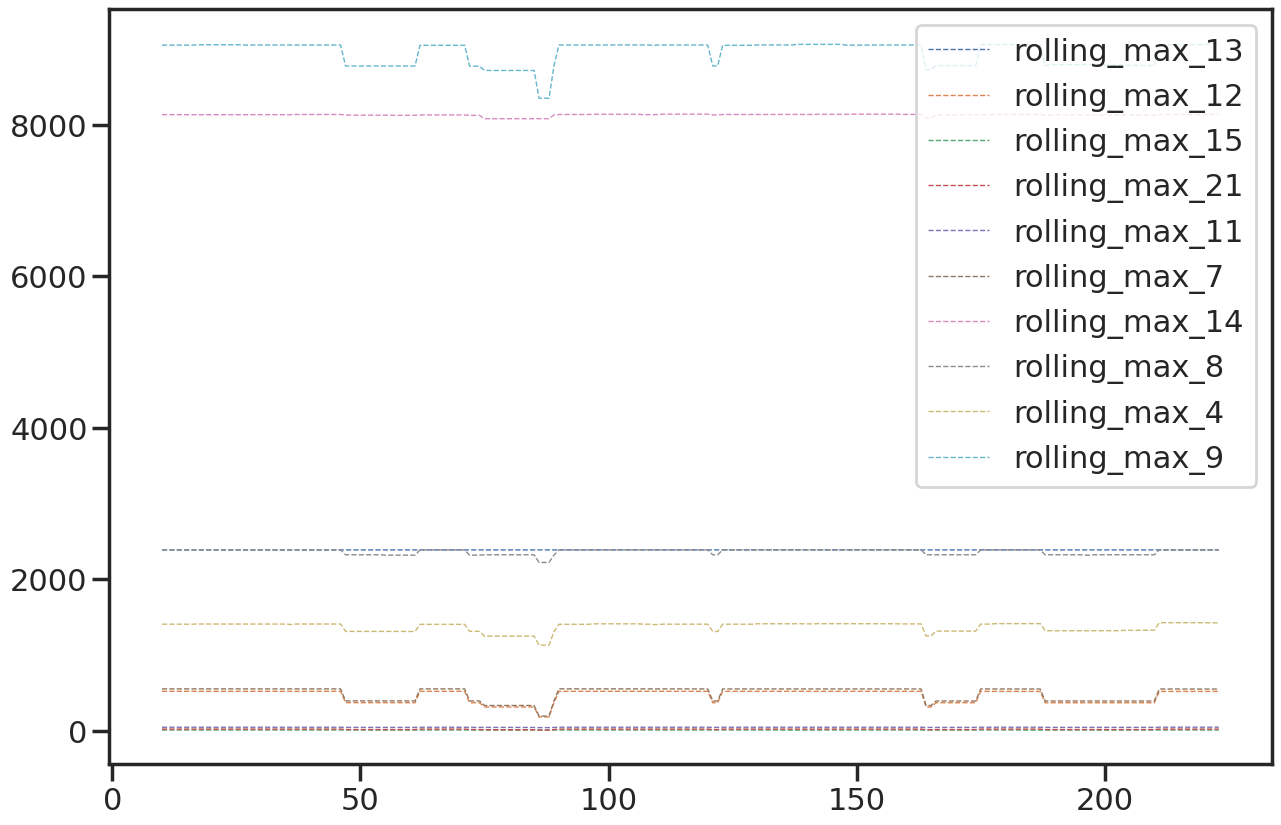

In [ ]:
plt.figure(figsize=(15,10), dpi=100)

for i in range(10):
    y_train = x[feat_importances.index[i]]
    plt.plot(x['Cycle'], y_train, linewidth=1, linestyle='dashed')
    
plt.legend(labels=feat_importances.index, loc='best');

## (f) Study
I've read the Prognosis.ipynb on github(https://github.com/mustafashabbir10/Prognosis/blob/master/Prognosis.ipynb), but haven't work on it due to time issue. Still mindblowing!

# 3. Programming Questions: Tabu & Genetic Algorithm

## (a) Self Study
Learn Genetic Algorithm (GA) from the internet video https://www.youtube.com/watch?v=kHyNqSnzP8Y or https://www.youtube.com/watch?v=Fdk7ZKJHFcI .

## (b) Tabu Search algorithm

### Intro


<img src="https://miro.medium.com/max/803/1*sfbgWMgcuO1GgNxr6y2rjQ.png" width=400/img>

Tabu 的執行大致上包含以下項目：
1. Calculation of objective function
2. 隨機給定初始 solution
  - 這部分是為了讓 Tabu 有個起點出發，尋找local 最佳解，首先 input data 並給予一個 seed 以產生隨機值
3. Swap Move
  - 這個步驟是為了尋找當前解附近有沒有更好的 solution，方式是交換 solution list 中的某兩個元素
4. 選出目前最好的路徑
  - Tabu List: 禁忌名單，避免拜訪最近有拜訪的節點
    - Tabu Tenure: Tabu list 的大小，例如 Tenure = 2，則代表這次被加進 Tabu List 的排程兩輪之後可以再次使用
    - Tabu Attribute: 有時候機台很多，只記得 swap move 可以增進效能。
  - Aspiration Criteria: 有時發現最好的排程是 Tabu list 上面的人，則允許走回頭路。
5. Stopping criteria
  - 由於 Tabu Search 不是全域搜尋，在沒有停止條件下可能會一直跑下去。
  - 停止條件可以是 iterations 的最大次數，當達到停止條件時就 return 當時的最佳解；如果還沒達到，就繼續前往 Step 4。

6. 更新並再次執行
  - Update Tabu list
  - Update Aspiration Criteria
  - goto Step 3 and countinue

### Process

In [1]:
import copy
import timeit

In [2]:
time = [10, 10, 13, 4, 9, 4, 8, 15, 7, 1, 9, 3, 15, 9, 11, 6, 5, 14, 18 ,3]
date = [50, 38, 49, 12, 20, 105, 73, 45, 6, 64, 15, 6, 92, 43, 78, 21, 15, 50, 150, 99]
weight = [10, 5, 1, 5, 10, 1, 5, 10, 5, 1, 5, 10 ,10 ,5, 1 ,10, 5, 5, 1, 5]

In [3]:
def compute_tardiness(current, length):

	result = 0
	for index1 in range(0, length):
		buf = 0
		for index2 in range(0, index1 + 1):
			buf += time[current[index2] - 1]
		buf -= date[current[index1] - 1]
		buf *= weight[current[index1] - 1]
		result += max(buf, 0)
  
	return result

In [4]:
def tabu_search(initial, tabu_size, iteration):

	current = copy.copy(initial)
	tabu_list = []
	solution_list = []
	solution_tardness = 999999

	while iteration > 0:
		buffer_tabu_pair = []
		buffer_list = []
		buffer_value = []

		for index in range(0,19):
			if [current[index + 1], current[index]] not in tabu_list:
				buffer_tabu_pair.append([current[index], current[index+1]])
				current[index], current[index+1] = current[index+1], current[index]
				buffer_value.append(compute_tardiness(current, len(initial)))
				buffer_list.append(copy.copy(current))
				current[index], current[index + 1] = current[index + 1], current[index]

		min_index = buffer_value.index(min(buffer_value))
  
		if solution_tardness > min(buffer_value):
			solution_tardness = min(buffer_value)
			solution_list = buffer_list[min_index]
		tabu_list.append(buffer_tabu_pair[min_index])
  
		if len(tabu_list) > tabu_size:
			tabu_list.pop(0)
		current = buffer_list[min_index]
		iteration = iteration - 1
    
	return [solution_tardness, solution_list]

In [5]:
best_solution = {
	"fitness_function_value": 99999999,
	"list": [],
	"waste_time": 0,
	"tabu_list_size": 0,
	"search_iteration": 0
}

for index1 in range(1, 11):
	for index2 in range(1, 101):
		start = timeit.default_timer()
		result = tabu_search(list(range(1, 21)), index1, index2)
		end = timeit.default_timer()

		if best_solution["fitness_function_value"] > result[0]:
			best_solution["fitness_function_value"] = result[0]
			best_solution["list"] = result[1]
			best_solution["waste_time"] = end - start
			best_solution["tabu_list_size"] = index1
			best_solution["search_iteration"] = index2
		print("Tabu list size: {}".format(index1))
		print("Tabu search iteration: {}".format(index2))
		print('Time: {}'.format(end - start))
		print("Solution tardness: {}".format(result[0]))
		print("Solution list: {}".format(result[1]))
		print("")

print("=== find solution process complete ===")
print("")
print("Best solution infomation:")
print("- Fitness function value: {}".format(best_solution["fitness_function_value"]))
print("- Best solution is: {}".format(best_solution["list"]))
print("- Tabu list size: {}".format(best_solution["tabu_list_size"]))
print("- Running time: {}".format(best_solution["waste_time"]))
print("- Search iteration: {}".format(best_solution["search_iteration"]))

串流輸出內容已截斷至最後 5000 行。
Tabu list size: 2
Tabu search iteration: 69
Time: 0.061415773000021545
Solution tardness: 2328
Solution list: [12, 9, 4, 16, 5, 17, 2, 1, 8, 10, 7, 3, 20, 13, 6, 11, 14, 18, 15, 19]

Tabu list size: 2
Tabu search iteration: 70
Time: 0.06508425200001966
Solution tardness: 2317
Solution list: [12, 9, 4, 16, 5, 17, 2, 1, 8, 10, 7, 3, 20, 13, 11, 6, 14, 18, 15, 19]

Tabu list size: 2
Tabu search iteration: 71
Time: 0.06522440099999471
Solution tardness: 2306
Solution list: [12, 9, 4, 16, 5, 17, 2, 1, 8, 10, 7, 3, 20, 13, 11, 14, 6, 18, 15, 19]

Tabu list size: 2
Tabu search iteration: 72
Time: 0.058579963999989104
Solution tardness: 2300
Solution list: [12, 9, 4, 16, 5, 17, 2, 1, 8, 10, 7, 3, 20, 13, 11, 14, 18, 6, 15, 19]

Tabu list size: 2
Tabu search iteration: 73
Time: 0.06156688000001509
Solution tardness: 2300
Solution list: [12, 9, 4, 16, 5, 17, 2, 1, 8, 10, 7, 3, 20, 13, 11, 14, 18, 6, 15, 19]

Tabu list size: 2
Tabu search iteration: 74
Time: 0.067492535000013

由 Tabu 演算法找到的解為：
- Optimal solution: [12, 9, 4, 16, 5, 17, 2, 1, 8, 10, 7, 13, 20, 14, 11, 18, 6, 15, 3, 19]
- Optimal function value: 1984

- When:
  - Tabu list size: 2
  - Running time: 0.073
  - Iteration: 83

- Parameter setting -  design of trial-and-error: 用兩層迴圈去遍歷不同的 tabu list size (1 to 10) 以及 iteration times（1 to 100）
- Number of tardy jobs: 17

### Reference
[1] [Medium - Tabu Search in Python](https://medium.com/swlh/tabu-search-in-python-3199c44d44f1)

[2] [Medium - 以Python實作禁忌搜索法(Tabu Search, TS)](https://medium.com/qiubingcheng/%E4%BB%A5python%E5%AF%A6%E4%BD%9C%E7%A6%81%E5%BF%8C%E6%90%9C%E7%B4%A2%E6%B3%95-tabu-search-ts-4d36f6571bcb)

## (c) Genetic Algorithm

### Intro

基因演算法(GA)是在模擬自然界的汰選，主要有以下機制：
- 染色體(chromosome)：將解比擬成一條染色體，常見編碼有
  - 二進位(Binary Representation and Encoding)：每條染色體都是由0、1組成。整數、實數的最佳化問題也可以轉換成二進位來處理
  - 整數(Integer Representation and Encoding)：染色體是由一連串的整數表達。適合用來表示組合優化問題的解，例如旅行推銷員問題(TSP)
  - 實數(Real Representation and Encoding)：每個變數應該有上界及下界，常用來表達連續優化問題的解
- 交配(crossover)：模仿生物學中交配的現象
- 突變(mutation)：模仿生物學中突變的現象
- 適應度(fitness)：根據適應度的高低，決定染色體去留，達到去蕪存菁的效果。

`跳脫生物學的思維，基因演算法(GA)即是在特定大小的解集合中，透過增添亂數、兩兩排列組合等操作來改變/產生新的解，並從中挑選較好的解保留到下個世代中，以確保解變異的方向能夠逐漸收斂。`

以下是基本基因演算法的圖解

<img src="https://miro.medium.com/max/1260/1*0gHAGpIf4YZYUCitWS0X7g.png" width=400/img>

1. Initialization：根據 population 大小進行 population 初始化，以及更多參數設定
2. Crossover：使用 Partially matched crossover(PMX)，從 population 隨機抽取幾對染色體作為 parent，進行 crossover 產生新的 offspring。

  <img src="https://miro.medium.com/max/1260/1*sOJR1cerqiNhrwe8csM2ig.png" width=400/img>

3. Mutation：使用 Inversion mutation，從 population 隨機抽取幾條染色體進行突變產生新的 offspring。
  <img src="https://miro.medium.com/max/1260/1*IY-oteV1gUQyDkZVDe8DSQ.png" width=400/img>

4. Fitness：計算所有染色體（population 加上新 offspring）的 fitness，此值用來估計這個解的優劣。fitness 會與 objective value 成反向關係。
  <img src="https://miro.medium.com/max/1114/1*-mB4Nk28HFEHEX5edVjavQ.png" width=400/img>

5. Update：倘若此代次最佳解的 fitness 勝過歷史最佳解，則更新歷史最佳解。
6. Selection：根據所有染色體的fitness以輪盤法進行挑選，成為下個代次的population。
  - Deterministic：完全依照適應度高低進行選取
  - Stochastic：隨機型的選法。依照適應度的高低有不同的機率被選取，常見方法為輪盤法。

### Process

In [8]:
# initialization
num_job=20 # number of jobs

p=[10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3]
d=[50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99]
w=[10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5]

# parameters
population_size = 30 # default value is 30
crossover_rate = 0.8 # default value is 0.8
mutation_rate = 0.05 # default value is 0.1
mutation_selection_rate = 0.5  # random select
num_mutation_jobs = round(num_job*mutation_selection_rate)
num_iteration = 100 # default value is 2000

start_time = time.time()

In [9]:
# generate initial population

Tbest=99999999999999
best_list,best_obj=[],[]
population_list=[]

for i in range(population_size):
    random_num=list(np.random.permutation(num_job)) # generate a random permutation of 0 to num_job-1
    population_list.append(random_num) # add to the population_list
        
for n in range(num_iteration):
    Tbest_now=99999999999           
    
    # Crossover
    parent_list=copy.deepcopy(population_list)
    offspring_list=copy.deepcopy(population_list)
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
    for m in range(int(population_size/2)):
        crossover_prob=np.random.rand()
        if crossover_rate>=crossover_prob:
            parent_1= population_list[S[2*m]][:]
            parent_2= population_list[S[2*m+1]][:]
            child_1=['na' for i in range(num_job)]
            child_2=['na' for i in range(num_job)]
            fix_num=round(num_job/2)
            g_fix=list(np.random.choice(num_job, fix_num, replace=False))
            
            for g in range(fix_num):
                child_1[g_fix[g]]=parent_2[g_fix[g]]
                child_2[g_fix[g]]=parent_1[g_fix[g]]
            c1=[parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
            c2=[parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]
            
            for i in range(num_job-fix_num):
                child_1[child_1.index('na')]=c1[i]
                child_2[child_2.index('na')]=c2[i]
            offspring_list[S[2*m]]=child_1[:]
            offspring_list[S[2*m+1]]=child_2[:]
        
    # Mutation  
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(num_job, num_mutation_jobs, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
    
    
    # Fitness value (calculate tardimess)
    total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
    chrom_fitness,chrom_fit=[],[]
    total_fitness=0
    for i in range(population_size*2):
        ptime=0
        tardiness=0
        for j in range(num_job):
            ptime=ptime+p[total_chromosome[i][j]]
            tardiness=tardiness+w[total_chromosome[i][j]]*max(ptime-d[total_chromosome[i][j]],0)
        chrom_fitness.append(1/tardiness)
        chrom_fit.append(tardiness)
        total_fitness=total_fitness+chrom_fitness[i]
    
    # Selection
    pk,qk=[],[]
    
    for i in range(population_size*2):
        pk.append(chrom_fitness[i]/total_fitness)
    for i in range(population_size*2):
        cumulative=0
        for j in range(0,i+1):
            cumulative=cumulative+pk[j]
        qk.append(cumulative)
    
    selection_rand=[np.random.rand() for i in range(population_size)]
    
    for i in range(population_size):
        if selection_rand[i]<=qk[0]:
            population_list[i]=copy.deepcopy(total_chromosome[0])
        else:
            for j in range(0,population_size*2-1):
                if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                    population_list[i]=copy.deepcopy(total_chromosome[j+1])
                    break
    # Comparison
    for i in range(population_size*2):
        if chrom_fit[i]<Tbest_now:
            Tbest_now=chrom_fit[i]
            sequence_now=copy.deepcopy(total_chromosome[i])
    
    if Tbest_now<=Tbest:
        Tbest=Tbest_now
        sequence_best=copy.deepcopy(sequence_now)
    
    job_sequence_ptime=0
    num_tardy=0
    for k in range(num_job):
        job_sequence_ptime=job_sequence_ptime+p[sequence_best[k]]
        if job_sequence_ptime>d[sequence_best[k]]:
            num_tardy=num_tardy+1

In [10]:
# result
print('Optimal sequence',sequence_best)
print('Optimal value:%f'%Tbest)
print('Average tardiness:%f'%(Tbest/num_job))
print('Number of tardy:%d'%num_tardy)
print('The elapsed time:%s'% (time.time() - start_time))

Optimal sequence [3, 9, 11, 16, 5, 13, 4, 15, 0, 7, 6, 10, 19, 14, 1, 8, 12, 17, 2, 18]
Optimal value:2805.000000
Average tardiness:140.250000
Number of tardy:14
The elapsed time:3.450589895248413


## (d) Please give a comparison between Tabu and GA.

- Tabu Search 擅長記住先前踩過的組合，GA 則是擅長發掘新的組合
- 兩者皆是用來找 local optimum，而非 global
- 在相同的 iteration limit 下，GA 演算法的最後結果似乎表現較好
  - Tabu 耽誤 17 個工作
  - GA 耽誤 14 個工作
- 原本的 raw data 便可從 jobs 看出機台不足的情況，因此建議增加機台或生產線

### Reference
[1] [以Python實作基因演算法(Genetic Algorithm , GA)並解決工作指派問題(Job Assignment Problem, JAP)](https://medium.com/qiubingcheng/%E4%BB%A5python%E5%AF%A6%E4%BD%9C%E5%9F%BA%E5%9B%A0%E6%BC%94%E7%AE%97%E6%B3%95-genetic-algorithm-ga-%E4%B8%A6%E8%A7%A3%E6%B1%BA%E5%B7%A5%E4%BD%9C%E6%8C%87%E6%B4%BE%E5%95%8F%E9%A1%8C-job-assignment-problem-jap-b0d7c4ad6d0f)

[2] [Github - Solving flow shop scheduling problem with genetic algorithm](https://github.com/wurmen/Genetic-Algorithm-for-Job-Shop-Scheduling-and-NSGA-II/blob/master/implementation%20with%20python/GA-flowshop/GA%20for%20flow%20shop%20problem.md)

[3] [Github - Genetic-Algorithm-for-Job-Shop-Scheduling-and-NSGA-II](https://github.com/wurmen/Genetic-Algorithm-for-Job-Shop-Scheduling-and-NSGA-II)